In [61]:
# imports necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit,cross_val_score,GridSearchCV,train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,MinMaxScaler
from sklearn.metrics import mean_squared_error,make_scorer

In [57]:
# loads dataset
df = pd.read_csv("../data/train.csv")
df2 = pd.read_csv("../data/additive.csv")


In [28]:
data_train = df[["DT_COMPTC"]][:3000]

#dados de treino
X_train = df.drop(["Fluxo","DT_COMPTC"],axis=1)[:3000]
y_train = df[["Fluxo"]][:3000]

#não sei bem pra que isso mas ajuda
data_test = df[["DT_COMPTC"]][3000:]

#dados de teste
X_test = df.drop(["Fluxo","DT_COMPTC"],axis=1)[3000:]
y_test = df[["Fluxo"]][3000:]

In [62]:
X= df.drop(["Fluxo","DT_COMPTC"],axis=1)
y = df[["Fluxo"]]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=11)



In [63]:
#padroniza os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
# y_train = scaler.fit_transform(y_train)
X_test = scaler.fit_transform(X_test)
# y_test = scaler.fit_transform(y_test)

In [48]:
params = {
    "n_estimators" : [45,50,75],
    "max_depth" : [1,2,3],
    "bootstrap" : [True],
    "n_jobs"  : [-1]
}

gs = GridSearchCV(RandomForestRegressor(),params)

In [50]:
gs.fit(X_train,y_train)

c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Usuario\AppData\Local\Pro

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [1, 2, 3],
                         'n_estimators': [45, 50, 75], 'n_jobs': [-1]})

In [51]:
gs.best_params_

{'bootstrap': True, 'max_depth': 2, 'n_estimators': 45, 'n_jobs': -1}

In [64]:
model = gs.best_estimator_
tscv = TimeSeriesSplit()
cv_results = cross_val_score(RandomForestRegressor(bootstrap= True,
 max_depth= 2,
 n_estimators= 45,
 n_jobs= -1),X_train,y_train,cv=tscv,scoring=make_scorer(mean_squared_error))


print(cv_results)

# model = RandomForestRegressor(1000)

# model.fit(X_train,y_train)

resposta = model.predict(X_test)



c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Usuario\AppData\Local\Pro

[64577.44981166 76346.70193934 41903.36495701 19958.75814934
 30173.25856469]


ValueError: X has 6 features, but RandomForestRegressor is expecting 4 features as input.

In [31]:
y_test.shape
data_test.values.shape

(1121, 1)

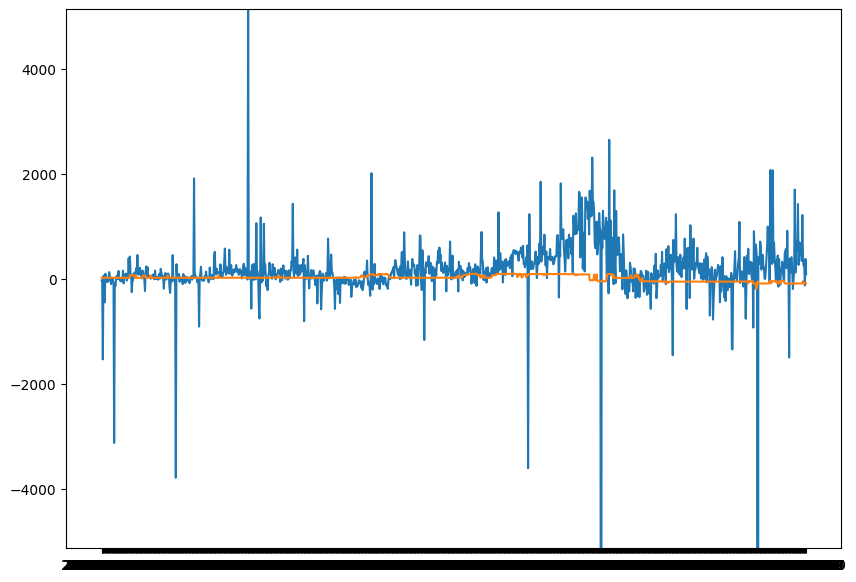

In [53]:
plt.figure(figsize=(10,7))
plt.plot(data_test.values.ravel(),y_test.values.ravel())
plt.plot(data_test.values.ravel(),resposta.ravel())
plt.ylim([-y_test["Fluxo"].max(),y_test["Fluxo"].max()])
plt.show()

In [58]:
df["cap"] = df2["CAPTC_DIA"]
df["resg"] = df2["RESG_DIA"]


In [59]:
df.corr()

,IBOV,Dol,NDX,SPX,Fluxo,cap,resg
IBOV,1.000000,0.635266,0.833133,0.797355,0.091723,0.649174,0.208245
Dol,0.635266,1.000000,0.925298,0.904620,0.038420,0.513351,0.198365
NDX,0.833133,0.925298,1.000000,0.977992,0.051630,0.597829,0.224206
SPX,0.797355,0.904620,0.977992,1.000000,0.059277,0.568180,0.203005
Fluxo,0.091723,0.038420,0.051630,0.059277,1.000000,0.205923,-0.892797
cap,0.649174,0.513351,0.597829,0.568180,0.205923,1.000000,0.256957
resg,0.208245,0.198365,0.224206,0.203005,-0.892797,0.256957,1.000000
